In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from Models.Layers import *
from Solver import *
from Models.Classifiers.Neural_Net import *
from General_Solver import *

In [71]:
# first step would be to import the dataset
X_full = pd.read_csv('./Datasets/red_wine_dataset.csv')
percentage = 0.8
# X_full.pop('k_value')
# X_full.pop('l_value')
# X_full.pop('m_value')
X_train = X_full.sample(frac=percentage, random_state=0)
y_train = X_train.pop('quality')
X_test = X_full.drop(X_train.index)
y_test = X_test.pop('quality')
print(len(X_train.index))
print(len(X_test.index))
X_full


1279
320


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,k_value,l_value,m_value,percentage_free_sulphur,n_value
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0,8.100,4.0500,0.636,30.909091,0.6080
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0,8.680,4.3400,0.778,26.800000,0.8290
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0,8.560,4.2800,0.742,36.000000,0.7440
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1,11.480,5.7400,0.655,35.294118,0.7195
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0,8.100,4.0500,0.636,30.909091,0.6080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0,6.800,3.4000,0.670,13.750000,0.6610
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1,6.450,3.2250,0.822,13.076923,0.7110
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1,6.810,3.4050,0.826,13.793103,0.7540
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0,6.545,3.2725,0.785,13.750000,0.6615


In [72]:
x_train = X_train.to_numpy()
x_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()
print(x_train.shape)
print(x_test.shape)
print(x_train.dtype)
print(y_train.shape)

(1279, 16)
(320, 16)
float64
(1279,)


(1279, 16)
(1279,)
0.12433391471702653
0.10003662221022867


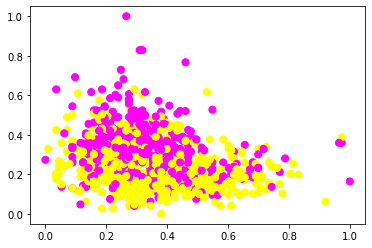

In [73]:
x_max = np.max(x_train, axis = 0)
x_min = np.min(x_train, axis = 0)
x_train = (x_train - x_min) / (x_max - x_min)
# mu = x_train.mean(axis = 0)
# sigma = x_train.std(axis = 0)
# x_train  = (x_train - x_train.mean(axis = 0))/x_train.std(axis = 0)
mu = x_min
sigma = (x_max - x_min)
print(x_train.shape)
print(y_train.shape)
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, s=50, cmap='spring')
print(x_train[:,3].mean())
print(x_train[:,3].std())
plt.show()


In [74]:
# class TwoLayerNet():
#     def __init__(self, input_dim, hidden_dim, output_dim, reg = 0.01):
#         self.reg = reg
#         self.params = {}
#         # Now we do intialization of the weights
#         np.random.seed(0)
#         self.params['W1'] = np.random.randn(input_dim, hidden_dim)*0.01
#         self.params['b1'] = np.zeros(hidden_dim)
#         self.params['W2'] = np.random.randn(hidden_dim, output_dim)*0.01
#         self.params['b2'] = np.zeros(output_dim)
#         self.output_dim = output_dim

#     def loss(self,X,y = None):
#         # define a mode here, i.e. a training mode or a test mode
#         mode = 'test' if y is None else 'train'
#         if(mode == 'train'):
#             cache = {}
#             loss = 0
#             grads = {}
#             z1, cache['affine_1'] = affine_forward(X,self.params['W1'],self.params['b1'])
#             a1,cache['relu_1'] = relu_forward(z1)
#             a2,cache['affine_2'] = affine_forward(a1,self.params['W2'], self.params['b2'])
#             loss, da2 = softmax_loss(a2,y)
#             da1, grads['W2'],grads['b2'] = affine_backward(da2,cache['affine_2'])
#             dz1 = relu_backward(da1, cache['relu_1'])
#             dx, grads['W1'],grads['b1'] = affine_backward(dz1, cache['affine_1'])
#             loss = loss + self.reg * (np.sum(self.params['W1']**2) + np.sum(self.params['W2']**2))
#             grads['W1'] = grads['W1'] + 2 * self.reg * self.params['W1']
#             grads['W2'] = grads['W2'] + 2 * self.reg * self.params['W2']
#             return loss, grads
#         else:
#             z1, cache['affine_1'] = affine_forward(X,self.params['W1'],self.params['b1'])
#             a1,cache['relu_1'] = relu_forward(z1)
#             a2,cache['affine_2'] = affine_forward(a1,self.params['W2'], self.params['b2'])
#             loss, da2 = softmax_loss(a2,y)
#             loss = loss + self.reg * (np.sum( (self.params['W1'] * self.params['W1'])))
#             loss = loss + self.reg * (np.sum( (self.params['W2'] * self.params['W2'])))
#             return loss
#     def predict(self, X):
#         cache= {}
#         z1, cache['affine_1'] = affine_forward(X,self.params['W1'],self.params['b1'])
#         a1,cache['relu_1'] = relu_forward(z1)
#         a2,cache['affine_2'] = affine_forward(a1,self.params['W2'], self.params['b2'])
#         print(a2.shape)
#         return np.argmax(a2,axis = 1)





In [75]:
Model = TwoLayerNet(input_dim = x_train.shape[1], hidden_dim = 10, output_dim = 2)

loss, grads = Model.loss(x_train, y_train)

print("loss =", loss)

Model.params['W1'] = Model.params['W1'] - 0.1*grads['W1']
Model.params['b1'] = Model.params['b1'] - 0.1*grads['b1']
Model.params['W2'] = Model.params['W2'] - 0.1*grads['W2']
Model.params['b2'] = Model.params['b2'] - 0.1*grads['b2']

loss, grads = Model.loss(x_train, y_train)
print("shape of W_1 = ",Model.params['W1'].shape)
scores = Model.predict(x_train)



for param,value in Model.params.items():
    print("param = ", param , "Value = ", Model.params[param])

# print((Model.params))


loss = 0.69333351460128
shape of W_1 =  (16, 10)
(1279, 2)
param =  W1 Value =  [[ 1.76614555e-02  3.97908839e-03  9.77762801e-03  2.23494041e-02
   1.86233884e-02 -9.76268176e-03  9.45608424e-03 -1.48356355e-03
  -1.02661852e-03  4.10583154e-03]
 [ 1.43170095e-03  1.45223071e-02  7.55116208e-03  1.21272497e-03
   4.43847713e-03  3.33483476e-03  1.49253894e-02 -2.06787113e-03
   3.12549594e-03 -8.52861167e-03]
 [-2.53923551e-02  6.49819119e-03  8.65822921e-03 -7.42745761e-03
   2.26266432e-02 -1.45322166e-02  4.12396478e-04 -1.82335388e-03
   1.53016469e-02  1.46780516e-02]
 [ 1.56245384e-03  3.77108798e-03 -8.86393221e-03 -1.97726166e-02
  -3.47516903e-03  1.55845456e-03  1.22734653e-02  1.20037279e-02
  -3.86425338e-03 -3.01534927e-03]
 [-1.04542352e-02 -1.41717893e-02 -1.70357577e-02  1.94660599e-02
  -5.08638126e-03 -4.37314002e-03 -1.25041064e-02  7.75784510e-03
  -1.61058383e-02 -2.12311949e-03]
 [-8.91838513e-03  3.85933027e-03 -5.11578841e-03 -1.17887589e-02
  -2.83571947e-04  

In [76]:
class NewSolver():
    def __init__(self, model, X_train, y_train, lr = 0.05, batch_size = 20, num_epochs = 10, print_every = 1000):
        self.lr = lr
        self.data = {}
        self.data['X_train'] = X_train
        self.data['y_train'] = y_train
        self.model = model
        self.batch_size = batch_size
        self.num_epochs = num_epochs
        self.print_every = print_every
        self.loss_history = np.array([])
        self.grad_history = np.array([])
        self.vel_history = np.array([])
        self.loss_2_history = np.array([])
        self.grad_2_history = np.array([])
        pass
    def train(self):
        # mu = 0.95
        # v_w = np.zeros(self.model.params['W'].shape)
        # v_b = np.zeros_like(self.model.params['b']) 
        for i in range(self.num_epochs):
            for j in range(self.data['X_train'].shape[0] // self.batch_size):
                X_batch = self.data['X_train'][j * self.batch_size:(j + 1) * self.batch_size, :]
                y_batch = self.data['y_train'][j * self.batch_size:(j + 1) * self.batch_size].reshape(-1,1)
                loss, grads = self.model.loss(X_batch, y_batch)
                # v_w = v_w*mu - self.lr * grads['W']
                # v_b = v_b*mu - self.lr * grads['b']
                # self.model.params['W'] += v_w
                # self.model.params['b'] += v_b
                self.model.params['W1'] += -1 * self.lr * grads['W1']
                self.model.params['b1'] += -1 * self.lr * grads['b1']
                self.model.params['W2'] += -1 * self.lr * grads['W2']
                self.model.params['b2'] += -1 * self.lr * grads['b2']
                if(j  == 0):
                    print("Epoch = ", i, "Batch = ", j, "Loss = ", loss, "Gradient_max = ", np.max(abs(grads['W1'])), "learning rate ratio = ",np.max(self.lr*grads['W1']/self.model.params['W1']))
                    self.loss_history = np.append(self.loss_history, loss)
                    self.grad_history = np.append(self.grad_history, np.linalg.norm(grads['W1']))            
                    # self.loss_history = np.append(self.loss_history, loss)
                    # self.grad_history = np.append(self.grad_history, np.sum(grads['W1'] * grads['W1']))
                    # self.vel_history = np.append(self.vel_history, np.sum(v_w * v_w))
                if(j == 35):
                    self.loss_2_history = np.append(self.loss_2_history, loss)
                    self.grad_2_history = np.append(self.grad_2_history, np.linalg.norm(grads['W1']))

        

In [77]:
NN = TwoLayerNet(input_dim = x_train.shape[1],hidden_dim= 10 , output_dim=2)
sgd_solver = GeneralSolver(NN, x_train, y_train, lr = 1.9e-5, batch_size = 20, num_epochs=1000, print_every=1000)
sgd_solver.train('sgd')

fine till here !
Epoch =  0 Batch =  0 Loss =  13.863044874778785
Epoch =  1 Batch =  0 Loss =  13.86304467546339
Epoch =  2 Batch =  0 Loss =  13.863044476029426
Epoch =  3 Batch =  0 Loss =  13.863044277009175
Epoch =  4 Batch =  0 Loss =  13.863044077917314
Epoch =  5 Batch =  0 Loss =  13.863043878645879
Epoch =  6 Batch =  0 Loss =  13.863043679304583
Epoch =  7 Batch =  0 Loss =  13.863043479811905
Epoch =  8 Batch =  0 Loss =  13.863043280231492
Epoch =  9 Batch =  0 Loss =  13.863043080647316
Epoch =  10 Batch =  0 Loss =  13.86304288093068
Epoch =  11 Batch =  0 Loss =  13.863042681407443
Epoch =  12 Batch =  0 Loss =  13.863042481955617
Epoch =  13 Batch =  0 Loss =  13.863042282771982
Epoch =  14 Batch =  0 Loss =  13.863042083043808
Epoch =  15 Batch =  0 Loss =  13.863041882987298
Epoch =  16 Batch =  0 Loss =  13.863041682785022
Epoch =  17 Batch =  0 Loss =  13.863041482388553
Epoch =  18 Batch =  0 Loss =  13.863041282058324
Epoch =  19 Batch =  0 Loss =  13.86304108207

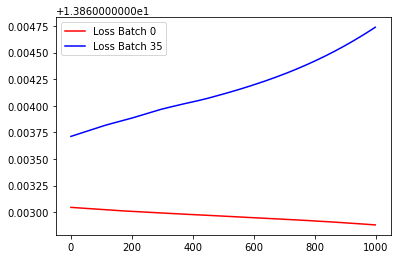

In [78]:
epochs = range(0,sgd_solver.num_epochs)
test_epochs  = range(0,sgd_solver.loss_history.shape[0])
plt.plot(test_epochs, sgd_solver.loss_history, label = 'Loss Batch 0 ', color = 'red')
plt.plot(test_epochs, sgd_solver.loss_final_history, label = 'Loss Batch 35', color = 'blue')
plt.legend()
plt.show()

In [87]:
SGD = NewSolver(Model, x_train, y_train, lr = 1.9e-5, batch_size = 20, num_epochs = 1000, print_every = 1000)
SGD.train()



Epoch =  0 Batch =  0 Loss =  13.866404713377248 Gradient_max =  0.012282357653694285 learning rate ratio =  0.0008070375991460248
Epoch =  1 Batch =  0 Loss =  13.86640237859875 Gradient_max =  0.012297596794739574 learning rate ratio =  0.0008224088133958646
Epoch =  2 Batch =  0 Loss =  13.866400044901193 Gradient_max =  0.012312854937309773 learning rate ratio =  0.0008383780116628888
Epoch =  3 Batch =  0 Loss =  13.866397712290292 Gradient_max =  0.012328132105021964 learning rate ratio =  0.000854980778712902
Epoch =  4 Batch =  0 Loss =  13.866395380766264 Gradient_max =  0.012343428321517792 learning rate ratio =  0.0008722555798834764
Epoch =  5 Batch =  0 Loss =  13.86639305032152 Gradient_max =  0.012358743610460984 learning rate ratio =  0.000890244058581184
Epoch =  6 Batch =  0 Loss =  13.86639072092224 Gradient_max =  0.012374077995511231 learning rate ratio =  0.0009088539934397749
Epoch =  7 Batch =  0 Loss =  13.866388392899264 Gradient_max =  0.012389431500747021 le

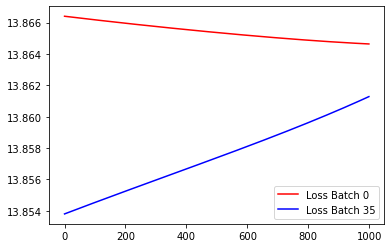

In [88]:
epochs = range(0,SGD.num_epochs)
test_epochs  = range(0,SGD.loss_history.shape[0])
plt.plot(test_epochs, SGD.loss_history, label = 'Loss Batch 0 ', color = 'red')
plt.plot(test_epochs, SGD.loss_2_history, label = 'Loss Batch 35', color = 'blue')
plt.legend()
plt.show()

In [89]:
# plt.plot(epochs, SGD.vel_history, label = 'Velocity', color = 'blue')
# plt.legend()
# plt.show()

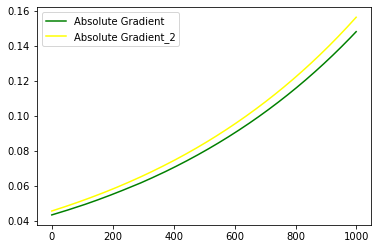

In [90]:
plt.plot(test_epochs, SGD.grad_history, label = 'Absolute Gradient', color = 'green')
plt.plot(test_epochs, SGD.grad_2_history, label = 'Absolute Gradient_2', color = 'yellow')
plt.legend()
plt.show()

In [91]:
def training_accuracy(model, x_train,y_train):
    y_pred = model.predict(x_train)
    y_new = y_train.reshape(y_pred.shape)
    return np.sum(y_new == y_pred) / y_new.shape[0]

print(np.sum(Model.predict(x_train)))
training_accuracy(Model, x_train, y_train)



(1279, 2)
1276
(1279, 2)


0.5324472243940579

In [92]:
def test_accuracy(model, x_test, y_test, mu, sigma):
    y_pred = model.predict((x_test - mu) / sigma)
    y_new = y_test.reshape(y_pred.shape)
    return np.sum(y_new == y_pred) / y_new.shape[0]

x_test_new = x_test
x_test_new = x_test_new 
test_accuracy(Model, x_test_new, y_test, mu, sigma)

(320, 2)


0.54375

In [95]:
print("training accuracy = ", training_accuracy(NN, x_train, y_train)* 100 ,'%')

(1279, 2)
training accuracy =  46.98983580922596 %


In [94]:
print("test accuracy = ", test_accuracy(NN, x_test, y_test, mu, sigma),'%')

(320, 2)


0.45625